# W266 Final Project - Amazon Reviews

This notebook is to read in the cleaned data and work with the data in keras.

http://jmcauley.ucsd.edu/data/amazon/links.html

In [32]:
import pandas as pd
import gzip
import random
from collections import defaultdict
import seaborn as sns
import numpy as np
import re

In [112]:
files = ['reviews_Video_Games.json.gz', 
         'reviews_Toys_and_Games.json.gz', 
         'reviews_Sports_and_Outdoors.json.gz', 
         'reviews_Movies_and_TV.json.gz',
         'reviews_Kindle_Store.json.gz', 
         'reviews_Home_and_Kitchen.json.gz',
         'reviews_Health_and_Personal_Care.json.gz', 
         'reviews_Electronics.json.gz',
         'reviews_Clothing_Shoes_and_Jewelry.json.gz',
         'reviews_Cell_Phones_and_Accessories.json.gz', 
         'reviews_CDs_and_Vinyl.json.gz',
         'reviews_Books.json.gz']
filesNames = ['reviews_Video_Games', 
              'reviews_Toys_and_Games',
              'reviews_Sports_and_Outdoors', 
              'reviews_Movies_and_TV',
              'reviews_Kindle_Store', 
              'reviews_Home_and_Kitchen',
              'reviews_Health_and_Personal_Care', 
              'reviews_Electronics',
              'reviews_Clothing_Shoes_and_Jewelry',
              'reviews_Cell_Phones_and_Accessories', 
              'reviews_CDs_and_Vinyl',
              'reviews_Books']

def dataFullSets(original, concatData, name):
    currentData = original
    appendData = pd.read_csv('../Data/%s'%(concatData))
    appendData['Product'] = name
    newDF = pd.concat([currentData,appendData])
    return(newDF)

train_data = pd.read_csv('../Data/%s_train.csv'%(filesNames[0]))
train_data['Product'] = filesNames[0]
test_data = pd.read_csv('../Data/%s_test.csv'%(filesNames[0]))
test_data['Product'] = filesNames[0]
                        
for fileName in filesNames[1:]:
    concatName_train = str(fileName+'_train.csv')
    concatName_test = fileName+'_test.csv'
                        
    train_data = dataFullSets(train_data, concatName_train, fileName).sample(frac=1)
    test_data = dataFullSets(test_data, concatName_test, fileName).sample(frac=1)

/home/mgvay31/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



In [113]:
train_data.head()

,Product,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,sentiment,summary,unixReviewTime
3268,reviews_Books,1936724197,"[0, 0]",5.0,You won't want to put it down! I could relate...,"03 14, 2013",A3BTQEA445S9PA,terri329,1,Beware!,1363219200
3914,reviews_Clothing_Shoes_and_Jewelry,B000GAYQJ0,"[1, 1]",5.0,There's not much to this watch. There's a time...,"06 17, 2013",AA4BOVQN0PR7F,John Wu,1,Simple but classic,1371427200
91132,reviews_Video_Games,B007FTE2VW,"[4, 4]",1.0,I was very excited to get Sim City and I'm ver...,"04 14, 2013",AZB0TFV30BQUF,J. Hatton,0,Lots of wasted potential...,1365897600
60441,reviews_Health_and_Personal_Care,B005CDYU2O,"[0, 0]",1.0,These are low quality without very much elasti...,"02 15, 2014",A3MLX03YMJ8FQU,umpqua girl,0,Can't wear them!,1392422400
62184,reviews_Books,1593106025,"[4, 5]",5.0,First let me note that this review is for the ...,"08 13, 2007",A1NPFGJBVLC2JM,Amazon Customer,1,I want to go back in time...,1186963200


In [114]:
test_data.head()

,Product,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,sentiment,summary,unixReviewTime
10544,reviews_Toys_and_Games,B00HGNFQ2G,"[0, 0]",1.0,These things actually cause more damage than t...,"02 2, 2014",A3JHIQSB2Y8HVH,Simon,0,Useless,1391299200
18518,reviews_CDs_and_Vinyl,B004I3U7XU,"[0, 0]",5.0,Exquisite. The fusion of jazz and gospel is w...,"04 20, 2013",A2OVEM6T75DS46,corine simons,1,KIm Burrell,1366416000
9004,reviews_Toys_and_Games,B007J3FBKU,"[0, 0]",5.0,"AnneThis castle will provide hours of fun, for...","04 9, 2013",A1SWPUZ50YA2LO,Anne,1,So Fun!,1365465600
15376,reviews_Clothing_Shoes_and_Jewelry,B002975T08,"[0, 0]",5.0,"Brilliant shoe. Extremely well made, and comf...","08 5, 2013",A39A74IID5DP5Z,Syrilla Phillips,1,wahhooooo,1375660800
14918,reviews_Books,0375720812,"[0, 0]",5.0,The questions really go in depth and are usefu...,"06 12, 2014",AFF92RPBRJQ32,kytey,1,A book with tons of uses,1402531200


In [78]:
#practice sentence
test_sentence = test_data['reviewText'].iloc[19]
test_sentence

'Horribly made piece of trash. The porn shots had no business there and the movie would have been 15 minutes long without the ludicrous slow motion footage and excruciatingly long profile shots of the stars expressionless face.People who declared it a real movie because of a percieved meaningful social message need to get out more. Bugs Bunny cartoons were more realistic and showed more talent.'

In [79]:
#prepare reviews to be split by words
#change to lowercase, remove punctuation and numbers
test_data_word_prep = re.sub("[^a-zA-Z]", " ", test_sentence).lower()
test_data_word_prep

'horribly made piece of trash  the porn shots had no business there and the movie would have been    minutes long without the ludicrous slow motion footage and excruciatingly long profile shots of the stars expressionless face people who declared it a real movie because of a percieved meaningful social message need to get out more  bugs bunny cartoons were more realistic and showed more talent '

In [80]:
#list of words after processing
test_data_word_prep.strip().split()

['horribly',
 'made',
 'piece',
 'of',
 'trash',
 'the',
 'porn',
 'shots',
 'had',
 'no',
 'business',
 'there',
 'and',
 'the',
 'movie',
 'would',
 'have',
 'been',
 'minutes',
 'long',
 'without',
 'the',
 'ludicrous',
 'slow',
 'motion',
 'footage',
 'and',
 'excruciatingly',
 'long',
 'profile',
 'shots',
 'of',
 'the',
 'stars',
 'expressionless',
 'face',
 'people',
 'who',
 'declared',
 'it',
 'a',
 'real',
 'movie',
 'because',
 'of',
 'a',
 'percieved',
 'meaningful',
 'social',
 'message',
 'need',
 'to',
 'get',
 'out',
 'more',
 'bugs',
 'bunny',
 'cartoons',
 'were',
 'more',
 'realistic',
 'and',
 'showed',
 'more',
 'talent']

In [81]:
#prepare reviews to be split by sentences
#change to lowercase, changes (!?) to (.), removes numbers, allows to be split by periods
test_data_sent_prep = re.sub("[!?]", ".", test_sentence)
test_data_sent_prep = re.sub("[^a-zA-Z.]", " ", test_data_sent_prep).lower()
test_data_sent_prep

'horribly made piece of trash. the porn shots had no business there and the movie would have been    minutes long without the ludicrous slow motion footage and excruciatingly long profile shots of the stars expressionless face.people who declared it a real movie because of a percieved meaningful social message need to get out more. bugs bunny cartoons were more realistic and showed more talent.'

In [93]:
#list of sentences after processing
[sent.strip(" ") for sent in test_data_sent_prep.split('.')]

['horribly made piece of trash',
 'the porn shots had no business there and the movie would have been    minutes long without the ludicrous slow motion footage and excruciatingly long profile shots of the stars expressionless face',
 'people who declared it a real movie because of a percieved meaningful social message need to get out more',
 'bugs bunny cartoons were more realistic and showed more talent',
 '']

In [115]:
play_data = test_data[:10]
#print(play_data)

#function to process review text and split into words
def splitWords(data):
    data_prep = str(data['reviewText'])
    data_prep = re.sub("[^a-zA-Z]", " ", data_prep).lower()
    return data_prep.split()

#function to process review text and split into sentences
def splitSentences(data):
    data_prep = str(data['reviewText'])
    data_prep = re.sub("[!?]", ".", data_prep)
    data_prep = re.sub("[^a-zA-Z.]", " ", data_prep).lower().split('.')
    data_prep = [sentence.strip(" ") for sentence in data_prep]
    return data_prep


#list of words from review into column
sentences = play_data.apply(splitWords, axis=1)
play_data.insert(loc = 11, column = 'sentenceWords', value = sentences)

sentences = train_data.apply(splitWords, axis=1)
train_data.insert(loc = 11,column = 'sentenceWords', value = sentences)

sentences = test_data.apply(splitWords, axis=1)
test_data.insert(loc = 11,column = 'sentenceWords', value = sentences)


#list of sentences from review into column
sentences_split = play_data.apply(splitSentences, axis=1)
play_data.insert(loc = 12, column = 'sentences', value = sentences_split)

sentences_split = train_data.apply(splitSentences, axis=1)
train_data.insert(loc = 12,column = 'sentences', value = sentences_split)

sentences_split = test_data.apply(splitSentences, axis=1)
test_data.insert(loc = 12,column = 'sentences', value = sentences_split)

In [123]:
wordFreq = defaultdict(int)

wordData = train_data['sentenceWords']

for row in wordData:
    for word in row:
        wordFreq[word] += 1      

In [124]:
wordsForHist = list(wordFreq.values())

/home/mgvay31/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Word Frequency for Train Data')

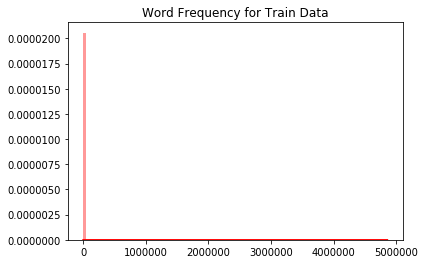

In [125]:
sns.distplot(wordsForHist, bins=100, color = 'red').set_title('Word Frequency for Train Data')

In [126]:
reviewLength = []

for row in wordData:
    reviewLength.append(len(row))

/home/mgvay31/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Sentence Lengths for Train Data')

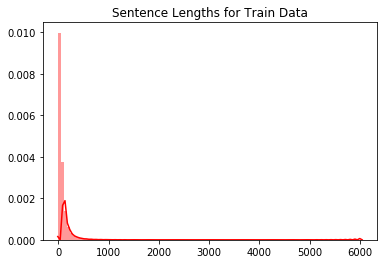

In [127]:
sns.distplot(reviewLength, bins=100, color = 'red').set_title('Sentence Lengths for Train Data')